In [165]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline



from thinkstats2 import Hist, Cdf, Pdf
import thinkplot

train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [142]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [143]:
bld_press = train_values['resting_blood_pressure']
bld_freq = bld_press.value_counts()
bld_freq[130]

26

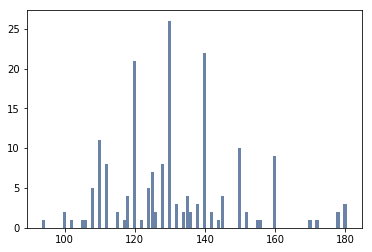

In [144]:
hist = Hist(bld_press)
thinkplot.Hist(hist)

In [145]:
bld_press.mean()

131.3111111111111

In [146]:
train_values['sex'].value_counts()

1    124
0     56
Name: sex, dtype: int64

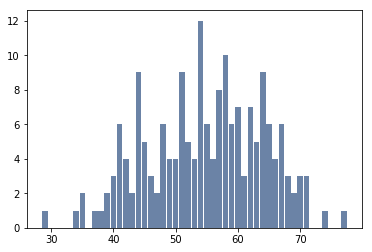

In [147]:
age_hist = Hist(train_values['age'])
thinkplot.Hist(age_hist)

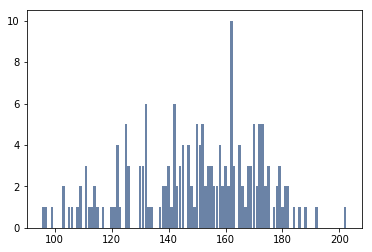

In [148]:
hist = Hist(train_values['max_heart_rate_achieved'])
thinkplot.Hist(hist)

{'xscale': 'linear', 'yscale': 'linear'}

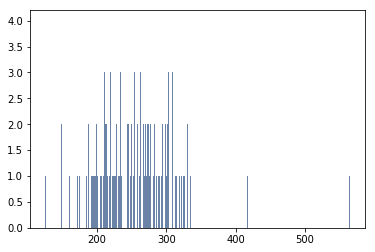

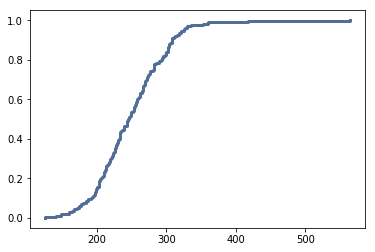

In [149]:
hist = Hist(train_values['serum_cholesterol_mg_per_dl'])
thinkplot.Hist(hist)
plt.figure()
cdf = Cdf(train_values['serum_cholesterol_mg_per_dl'])
thinkplot.Cdf(cdf)

In [150]:
features = train_values[train_values.columns[1:]]
response = train_labels['heart_disease_present']
X = features
y = response
X = pd.get_dummies(X,drop_first=True)
# for each in df_t.columns:
#     print(each)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21, stratify=y)
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/diego/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/diego/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [172]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.5555555555555556

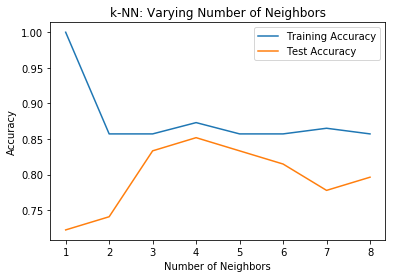

In [173]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [183]:
c_space = np.logspace(-5, 13, 51)
param_grid = {'C': c_space, 'penalty': ['l2']}
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
# logreg_cv.f1_score()

Tuned Logistic Regression Parameters: {'C': 0.007585775750291836, 'penalty': 'l2'}
Best score is 0.8412698412698413


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [160]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=8)

# Print the cross-validated scores
print(ridge_cv)

[0.33191731 0.40388812 0.52259627 0.67385068 0.42738188 0.40771736
 0.20606914 0.52572293]


In [170]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.4,random_state=21, stratify=y)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring=make_scorer(f1_score))
logreg_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
set(y_test) - set(y_pred)

/home/diego/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/diego/anaconda3/lib/python3.6/site-packages/skl

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l2'}
Best score is 0.8081040018346519


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{1}

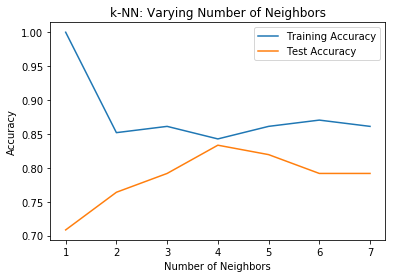

In [158]:
neighbors = np.arange(1,8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8333333333333334
Accuracy without Scaling: 0.5185185185185185


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [19]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = LogisticRegression().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8333333333333334
Accuracy without Scaling: 0.8333333333333334


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data 

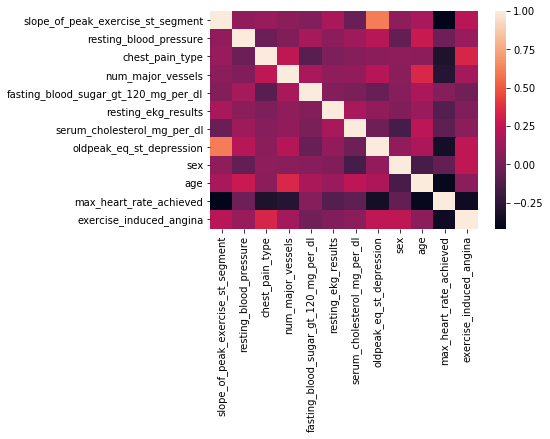

In [22]:
corr = train_values.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [24]:
# scale data

scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

In [118]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(14,)))
# Add one hidden layer 
model.add(Dense(4, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [119]:
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
# model.get_config()
# List all weight tensors 
# model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [120]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam')


# if (X_train.ndim == 1):
#     X_train = numpy.array([XpredictInputData])
model.fit(X_train, y_train,epochs=1, batch_size=1, verbose=0)

In [121]:
y_pred = model.predict_classes(X_test)
# print(y_pred[:5])
# print(y_test[:5])
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

54/54 [==============================] - 0s 3ms/step
0.6703986922899882


In [122]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [123]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8181818181818182
0.3103448275862069


In [139]:
model = Sequential()
# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(14,)))
# Add one hidden layer 
model.add(Dense(6, activation='tanh'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam')


model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=0)
y_pred = model.predict_classes(X_test)
# print(y_pred[:5])
# print(y_test[:5])
score = model.evaluate(X_test, y_test,verbose=1)
print("score: ",score)
print("precision: ",precision_score(y_test, y_pred))
print("recall: ",recall_score(y_test, y_pred))
print("f1: ",f1_score(y_test, y_pred))

54/54 [==============================] - 0s 6ms/step
score:  0.7220915291044447
precision:  0.9545454545454546
recall:  0.7241379310344828
f1:  0.823529411764706
